<a href="https://colab.research.google.com/github/Steffenanderson/NFL-Predictions/blob/main/NFL_Predictions_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2 - Part 2

Your task for this week is to start cleaning and exploring the data you selected last week. Make sure to check the quality of the data - do you need to deal with missing values? Are there any outliers? Etc. Also start exploring your data - look for trends, create visualizations, etc.

### Import Libraries and Mount Data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

offense = pd.read_excel('/content/drive/MyDrive/NFL Predictions/NFL_historical_statistics_offense.xlsx')
defense = pd.read_excel('/content/drive/MyDrive/NFL Predictions/NFL_historical_statistics_defense.xlsx')
sb_winner = pd.read_excel('/content/drive/MyDrive/NFL Predictions/NFL_historical_statistics_superbowl.xlsx')

In [29]:
# offense data
offense.head()

,Rk,Tm,G,PF_Total,Yds_Total,Ply_Total,Y/P_Total,TO_Total,FL_Total,1stD_Total,Cmp_Passing,Att_Passing,Yds_Passing,TD_Passing,Int_Passing,NY/A_Passing,1stD_Passing,Att_Rushing,Yds_Rushing,TD_Rushing,Y/A_Rushing,1stD_Rushing,Pen_Penalties,Yds_Penalties,1stPy_Penalties,Sc%,TO%,EXP,Year,Off_Def
0,1,Green Bay Packers,16,509,6224,990,6.3,11,6,358,372,526,4106,48,5,7.5,216,443,2118,16,4.8,114,84,684,28,49.7,5.6,290.75,2020,Offense
1,2,Buffalo Bills,16,501,6343,1034,6.1,22,11,397,410,596,4620,40,11,7.4,240,411,1723,16,4.2,119,102,941,38,49.4,11.8,228.66,2020,Offense
2,3,Tampa Bay Buccaneers,16,492,6145,1017,6.0,17,5,364,410,626,4626,42,12,7.1,238,369,1519,16,4.1,82,84,715,44,47.8,8.9,246.24,2020,Offense
3,4,Tennessee Titans,16,491,6343,1031,6.2,12,5,381,316,485,3653,33,7,7.2,203,521,2690,26,5.2,142,86,783,36,47.9,7.2,245.01,2020,Offense
4,5,New Orleans Saints,16,482,6023,1045,5.8,17,9,367,370,522,3758,28,8,6.8,199,494,2265,30,4.6,147,98,1005,21,45.5,9.0,176.94,2020,Offense


In [30]:
# defense data
defense.head()

,Rk,Tm,G,PF_Total,Yds_Total,Ply_Total,Y/P_Total,TO_Total,FL_Total,1stD_Total,Cmp_Passing,Att_Passing,Yds_Passing,TD_Passing,Int_Passing,NY/A_Passing,1stD_Passing,Att_Rushing,Yds_Rushing,TD_Rushing,Y/A_Rushing,1stD_Rushing,Pen_Penalties,Yds_Penalties,1stPy_Penalties,Sc%,TO%,EXP,Year,Off_Def
0,1,Los Angeles Rams,16,296,4511,989,4.6,22,8,280,347,548,3051,17,14,5.1,170,388,1460,12,3.8,91,78,582,19,27.9,12.0,85.89,2020,Defense
1,2,Baltimore Ravens,16,303,5276,1017,5.2,22,12,347,380,596,3536,22,10,5.6,213,382,1740,12,4.6,96,77,646,38,30.0,12.4,-17.69,2020,Defense
2,3,Pittsburgh Steelers,16,312,4893,996,4.9,27,9,281,298,526,3110,22,18,5.3,163,414,1783,13,4.3,94,103,980,24,29.3,13.8,33.24,2020,Defense
3,4,Washington Football Team,16,329,4873,1004,4.9,23,7,289,330,529,3068,21,16,5.3,161,428,1805,14,4.2,100,85,708,28,31.4,12.2,32.51,2020,Defense
4,5,New Orleans Saints,16,337,4974,992,5.0,26,8,320,333,557,3472,28,18,5.8,185,390,1502,11,3.9,85,64,517,50,34.7,13.1,-40.02,2020,Defense


In [31]:
# superbowl stats
sb_winner.head()

,Date,SB,Winner,Pts,Loser,Pts.1,MVP,Stadium,City,State
0,Feb 7 2021,55,Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
1,Feb 2 2020,54,Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
2,Feb 3 2019,53,New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
3,Feb 4 2018,52,Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
4,Feb 5 2017,51,New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas


### Exploratory Data Analaysis (EDA)

In [32]:
# change column names
offense.drop(columns='Off_Def',inplace=True)
offense.columns = ['O_Rank', 'Team', 'O_Games_Played', 'O_Points_For', 'O_Total_Yards',
       'O_Plays', 'O_Y/Play', 'O_TO', 'O_Fumbles_Lost',
       'O_1st_D', 'O_P_Completions', 'O_P_Attempts', 'O_P_Yards', 'O_P_TD',
       'O_P_Int', 'O_P_Y/PA', 'O_P_Passing_1st_D', 'O_R_Att', 'O_R_Yards',
       'O_R_TD', 'O_R_Y/A', 'O_R_1st_D', 'O_Pe', 'O_Pe_Yards',
       'O_Pe_1st_D', 'O_Scoring_Drives', 'O_TO_%', 'O_Expected_Points', 'Year']

offense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   O_Rank             352 non-null    int64  
 1   Team               352 non-null    object 
 2   O_Games_Played     352 non-null    int64  
 3   O_Points_For       352 non-null    int64  
 4   O_Total_Yards      352 non-null    int64  
 5   O_Plays            352 non-null    int64  
 6   O_Y/Play           352 non-null    float64
 7   O_TO               352 non-null    int64  
 8   O_Fumbles_Lost     352 non-null    int64  
 9   O_1st_D            352 non-null    int64  
 10  O_P_Completions    352 non-null    int64  
 11  O_P_Attempts       352 non-null    int64  
 12  O_P_Yards          352 non-null    int64  
 13  O_P_TD             352 non-null    int64  
 14  O_P_Int            352 non-null    int64  
 15  O_P_Y/PA           352 non-null    float64
 16  O_P_Passing_1st_D  352 non

In [33]:
# change column names
defense.drop(columns='Off_Def',inplace=True)
defense.columns = ['D_Rank', 'Team', 'D_Games_Played', 'D_Points_Allowed', 'D_Total_Yards',
       'D_Plays', 'D_Y/Play', 'D_TD', 'D_Fumbles_Lost',
       'D_1st_D', 'D_P_Completions', 'D_P_Attempts', 'D_P_Yards', 'D_P_TD',
       'D_P_Int', 'D_P_Y/PA', 'D_P_Passing_1st_D', 'D_R_Att', 'D_R_Yards',
       'D_R_TD', 'D_R_Y/A', 'D_R_1st_D', 'D_Pe', 'D_Pe_Yards',
       'D_Pe_1st_D', 'D_Scoring_Drives', 'D_TD_%', 'D_Expected_Points', 'Year']

defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   D_Rank             352 non-null    int64  
 1   Team               352 non-null    object 
 2   D_Games_Played     352 non-null    int64  
 3   D_Points_Allowed   352 non-null    int64  
 4   D_Total_Yards      352 non-null    int64  
 5   D_Plays            352 non-null    int64  
 6   D_Y/Play           352 non-null    float64
 7   D_TD               352 non-null    int64  
 8   D_Fumbles_Lost     352 non-null    int64  
 9   D_1st_D            352 non-null    int64  
 10  D_P_Completions    352 non-null    int64  
 11  D_P_Attempts       352 non-null    int64  
 12  D_P_Yards          352 non-null    int64  
 13  D_P_TD             352 non-null    int64  
 14  D_P_Int            352 non-null    int64  
 15  D_P_Y/PA           352 non-null    float64
 16  D_P_Passing_1st_D  352 non

In [34]:
# merge offense and defense data
off_def = offense.merge(defense)
off_def.head()

,O_Rank,Team,O_Games_Played,O_Points_For,O_Total_Yards,O_Plays,O_Y/Play,O_TO,O_Fumbles_Lost,O_1st_D,O_P_Completions,O_P_Attempts,O_P_Yards,O_P_TD,O_P_Int,O_P_Y/PA,O_P_Passing_1st_D,O_R_Att,O_R_Yards,O_R_TD,O_R_Y/A,O_R_1st_D,O_Pe,O_Pe_Yards,O_Pe_1st_D,O_Scoring_Drives,O_TO_%,O_Expected_Points,Year,D_Rank,D_Games_Played,D_Points_Allowed,D_Total_Yards,D_Plays,D_Y/Play,D_TD,D_Fumbles_Lost,D_1st_D,D_P_Completions,D_P_Attempts,D_P_Yards,D_P_TD,D_P_Int,D_P_Y/PA,D_P_Passing_1st_D,D_R_Att,D_R_Yards,D_R_TD,D_R_Y/A,D_R_1st_D,D_Pe,D_Pe_Yards,D_Pe_1st_D,D_Scoring_Drives,D_TD_%,D_Expected_Points
0,1,Green Bay Packers,16,509,6224,990,6.3,11,6,358,372,526,4106,48,5,7.5,216,443,2118,16,4.8,114,84,684,28,49.7,5.6,290.75,2020,13,16,369,5344,974,5.5,18,7,332,346,536,3539,23,11,6.1,184,397,1805,16,4.5,119,79,734,29,39.9,11.4,-109.67
1,2,Buffalo Bills,16,501,6343,1034,6.1,22,11,397,410,596,4620,40,11,7.4,240,411,1723,16,4.2,119,102,941,38,49.4,11.8,228.66,2020,16,16,375,5640,1025,5.5,26,11,351,369,573,3726,23,15,6.1,199,414,1914,21,4.6,125,86,728,27,39.4,15.3,-123.10
2,3,Tampa Bay Buccaneers,16,492,6145,1017,6.0,17,5,364,410,626,4626,42,12,7.1,238,369,1519,16,4.1,82,84,715,44,47.8,8.9,246.24,2020,8,16,355,5234,1023,5.1,25,10,319,426,617,3945,29,15,5.9,215,358,1289,10,3.6,78,95,1015,26,33.7,14.0,-22.04
3,4,Tennessee Titans,16,491,6343,1031,6.2,12,5,381,316,485,3653,33,7,7.2,203,521,2690,26,5.2,142,86,783,36,47.9,7.2,245.01,2020,24,16,439,6372,1076,5.9,23,8,391,423,630,4439,36,15,6.8,247,427,1933,18,4.5,113,103,840,31,45.2,13.3,-185.20
4,5,New Orleans Saints,16,482,6023,1045,5.8,17,9,367,370,522,3758,28,8,6.8,199,494,2265,30,4.6,147,98,1005,21,45.5,9.0,176.94,2020,5,16,337,4974,992,5.0,26,8,320,333,557,3472,28,18,5.8,185,390,1502,11,3.9,85,64,517,50,34.7,13.1,-40.02


In [35]:
sb_winner.head()

,Date,SB,Winner,Pts,Loser,Pts.1,MVP,Stadium,City,State
0,Feb 7 2021,55,Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
1,Feb 2 2020,54,Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
2,Feb 3 2019,53,New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
3,Feb 4 2018,52,Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
4,Feb 5 2017,51,New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas


In [36]:
# format date to year 
sb_winner.Date = pd.to_datetime(sb_winner.Date)
sb_winner['Year'] = pd.DatetimeIndex(sb_winner['Date']).year
# new DataFrame with year and winner
sb_winner = sb_winner[['Year', 'Winner']]
# minus 1 year - 2021 calendar year SB is for 2020 season
sb_winner['Year'] = sb_winner['Year'] - 1
# add Superbowl column with 1 
sb_winner['Superbowl Winner'] = 1

sb_winner.head()

,Year,Winner,Superbowl Winner
0,2020,Tampa Bay Buccaneers,1
1,2019,Kansas City Chiefs,1
2,2018,New England Patriots,1
3,2017,Philadelphia Eagles,1
4,2016,New England Patriots,1


In [37]:
sb_winner['Superbowl Winner'].value_counts()

1    55
Name: Superbowl Winner, dtype: int64

In [48]:
# merge superbowl winner to off_def df
data = pd.merge(off_def, sb_winner, left_on = ['Year', 'Team'], right_on = ['Year', 'Winner'], how = 'left' )

data['Superbowl Winner'].value_counts()

data['Superbowl Winner'].replace(to_replace=np.NaN, value=0, inplace=True)
data.drop(columns='Winner', inplace=True)

data['Superbowl Winner'].value_counts()
data.head()

,O_Rank,Team,O_Games_Played,O_Points_For,O_Total_Yards,O_Plays,O_Y/Play,O_TO,O_Fumbles_Lost,O_1st_D,O_P_Completions,O_P_Attempts,O_P_Yards,O_P_TD,O_P_Int,O_P_Y/PA,O_P_Passing_1st_D,O_R_Att,O_R_Yards,O_R_TD,O_R_Y/A,O_R_1st_D,O_Pe,O_Pe_Yards,O_Pe_1st_D,O_Scoring_Drives,O_TO_%,O_Expected_Points,Year,D_Rank,D_Games_Played,D_Points_Allowed,D_Total_Yards,D_Plays,D_Y/Play,D_TD,D_Fumbles_Lost,D_1st_D,D_P_Completions,D_P_Attempts,D_P_Yards,D_P_TD,D_P_Int,D_P_Y/PA,D_P_Passing_1st_D,D_R_Att,D_R_Yards,D_R_TD,D_R_Y/A,D_R_1st_D,D_Pe,D_Pe_Yards,D_Pe_1st_D,D_Scoring_Drives,D_TD_%,D_Expected_Points,Superbowl Winner
0,1,Green Bay Packers,16,509,6224,990,6.3,11,6,358,372,526,4106,48,5,7.5,216,443,2118,16,4.8,114,84,684,28,49.7,5.6,290.75,2020,13,16,369,5344,974,5.5,18,7,332,346,536,3539,23,11,6.1,184,397,1805,16,4.5,119,79,734,29,39.9,11.4,-109.67,0.0
1,2,Buffalo Bills,16,501,6343,1034,6.1,22,11,397,410,596,4620,40,11,7.4,240,411,1723,16,4.2,119,102,941,38,49.4,11.8,228.66,2020,16,16,375,5640,1025,5.5,26,11,351,369,573,3726,23,15,6.1,199,414,1914,21,4.6,125,86,728,27,39.4,15.3,-123.10,0.0
2,3,Tampa Bay Buccaneers,16,492,6145,1017,6.0,17,5,364,410,626,4626,42,12,7.1,238,369,1519,16,4.1,82,84,715,44,47.8,8.9,246.24,2020,8,16,355,5234,1023,5.1,25,10,319,426,617,3945,29,15,5.9,215,358,1289,10,3.6,78,95,1015,26,33.7,14.0,-22.04,1.0
3,4,Tennessee Titans,16,491,6343,1031,6.2,12,5,381,316,485,3653,33,7,7.2,203,521,2690,26,5.2,142,86,783,36,47.9,7.2,245.01,2020,24,16,439,6372,1076,5.9,23,8,391,423,630,4439,36,15,6.8,247,427,1933,18,4.5,113,103,840,31,45.2,13.3,-185.20,0.0
4,5,New Orleans Saints,16,482,6023,1045,5.8,17,9,367,370,522,3758,28,8,6.8,199,494,2265,30,4.6,147,98,1005,21,45.5,9.0,176.94,2020,5,16,337,4974,992,5.0,26,8,320,333,557,3472,28,18,5.8,185,390,1502,11,3.9,85,64,517,50,34.7,13.1,-40.02,0.0


In [81]:
year_5y = data[(data['Year'] > 2015)]
year_5y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   O_Rank             160 non-null    int64  
 1   Team               160 non-null    object 
 2   O_Games_Played     160 non-null    int64  
 3   O_Points_For       160 non-null    int64  
 4   O_Total_Yards      160 non-null    int64  
 5   O_Plays            160 non-null    int64  
 6   O_Y/Play           160 non-null    float64
 7   O_TO               160 non-null    int64  
 8   O_Fumbles_Lost     160 non-null    int64  
 9   O_1st_D            160 non-null    int64  
 10  O_P_Completions    160 non-null    int64  
 11  O_P_Attempts       160 non-null    int64  
 12  O_P_Yards          160 non-null    int64  
 13  O_P_TD             160 non-null    int64  
 14  O_P_Int            160 non-null    int64  
 15  O_P_Y/PA           160 non-null    float64
 16  O_P_Passing_1st_D  160 non

In [ ]:
sns.pairplot(year_2020, kind='scatter', hue='Team');

In [87]:
fig1 = px.scatter(year_5y, x='O_TO', y= 'O_Pe_Yards', color="Superbowl Winner",
                 size='O_Pe_1st_D')
fig1.update_layout(title='4 Features KMeans (Size= Offensive Penalty resulting in 1st Down)')
fig1.show()

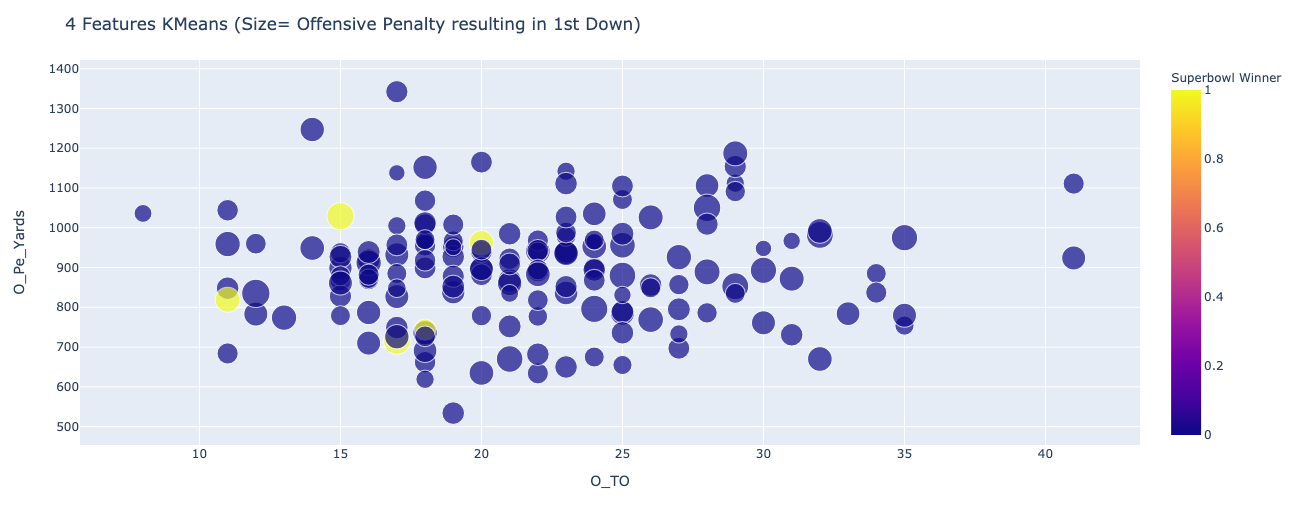

      The last 5 Superbowl winners all had less than 21 Offensive Turnovers
      All but 1 of 5 Superbowl winners allowed for more than 1k Penalty Yards



In [90]:
fig1 = px.scatter(year_5y, x='D_P_Int', y= 'D_Pe_Yards', color="Superbowl Winner",
                 size='D_Pe_1st_D')
fig1.update_layout(title='4 Features KMeans (Size= Defensive Penalty resulting in 1st Down)')
fig1.show()

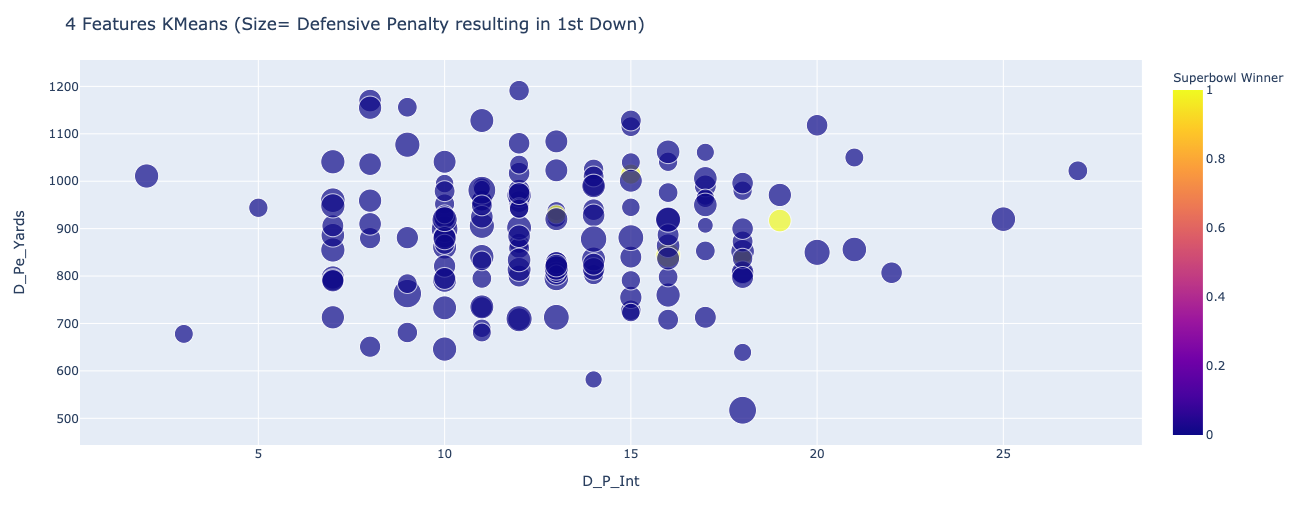

      No correlation to the number of Defensive Pass Interfernce penalties and Superbowl winners
      No correlation to the number of Defensive Penalties and Superbowl winners

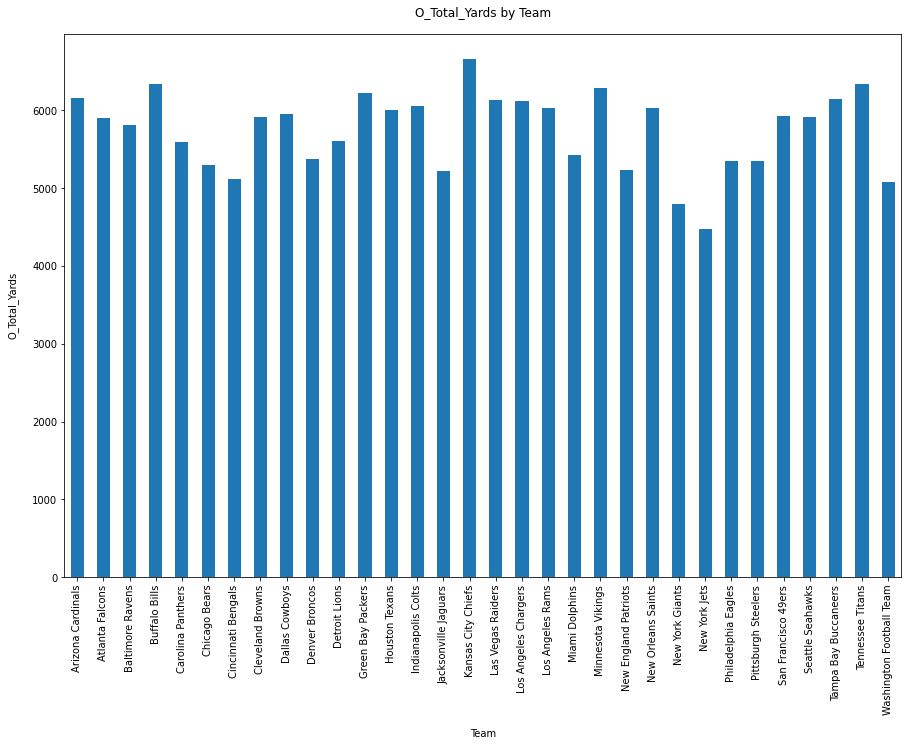

In [68]:
table1 = pd.pivot_table(year_2020,index=['Team'],values=['O_Total_Yards'])
table1
table1.plot(kind='bar',legend=None, figsize=(15, 10))
plt.xlabel('Team', labelpad=14)
plt.ylabel('O_Total_Yards', labelpad=14)
plt.title('O_Total_Yards by Team', y=1.02);

plt.show();

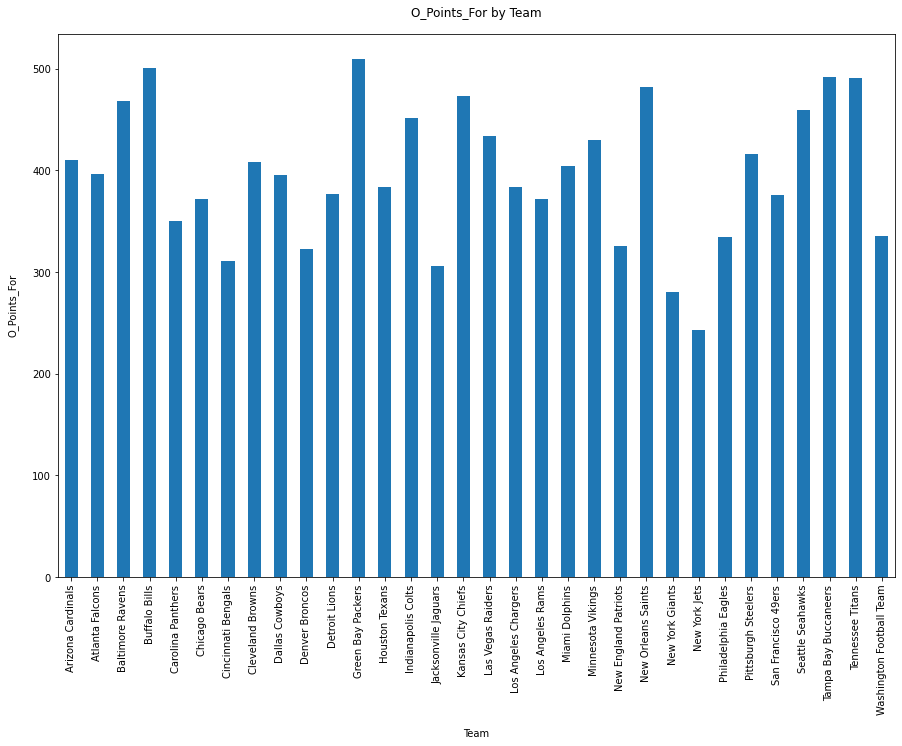

In [70]:
table1 = pd.pivot_table(year_2020,index=['Team'],values=['O_Points_For'])
table1
table1.plot(kind='bar',legend=None, figsize=(15, 10))
plt.xlabel('Team', labelpad=14)
plt.ylabel('O_Points_For', labelpad=14)
plt.title('O_Points_For by Team', y=1.02);

plt.show();

#### Missing Data

       No missing or odd data

In [52]:
data.isnull().sum()

O_Rank               0
Team                 0
O_Games_Played       0
O_Points_For         0
O_Total_Yards        0
O_Plays              0
O_Y/Play             0
O_TO                 0
O_Fumbles_Lost       0
O_1st_D              0
O_P_Completions      0
O_P_Attempts         0
O_P_Yards            0
O_P_TD               0
O_P_Int              0
O_P_Y/PA             0
O_P_Passing_1st_D    0
O_R_Att              0
O_R_Yards            0
O_R_TD               0
O_R_Y/A              0
O_R_1st_D            0
O_Pe                 0
O_Pe_Yards           0
O_Pe_1st_D           0
O_Scoring_Drives     0
O_TO_%               0
O_Expected_Points    0
Year                 0
D_Rank               0
D_Games_Played       0
D_Points_Allowed     0
D_Total_Yards        0
D_Plays              0
D_Y/Play             0
D_TD                 0
D_Fumbles_Lost       0
D_1st_D              0
D_P_Completions      0
D_P_Attempts         0
D_P_Yards            0
D_P_TD               0
D_P_Int              0
D_P_Y/PA   

# Citations

1. https://www.pro-football-reference.com/
2. https://realpython.com/pandas-merge-join-and-concat/